<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_101955023_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [ ]:
!pip install astroquery

In [2]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_1.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.01)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 101955023
period = 1.6289230050605  # Orbital period in days
epoch = 1544.71564547728
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.25]
folded_lc = folded_lc[folded_lc.time > -0.25]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_101955023_all_sector_lightcurve.csv


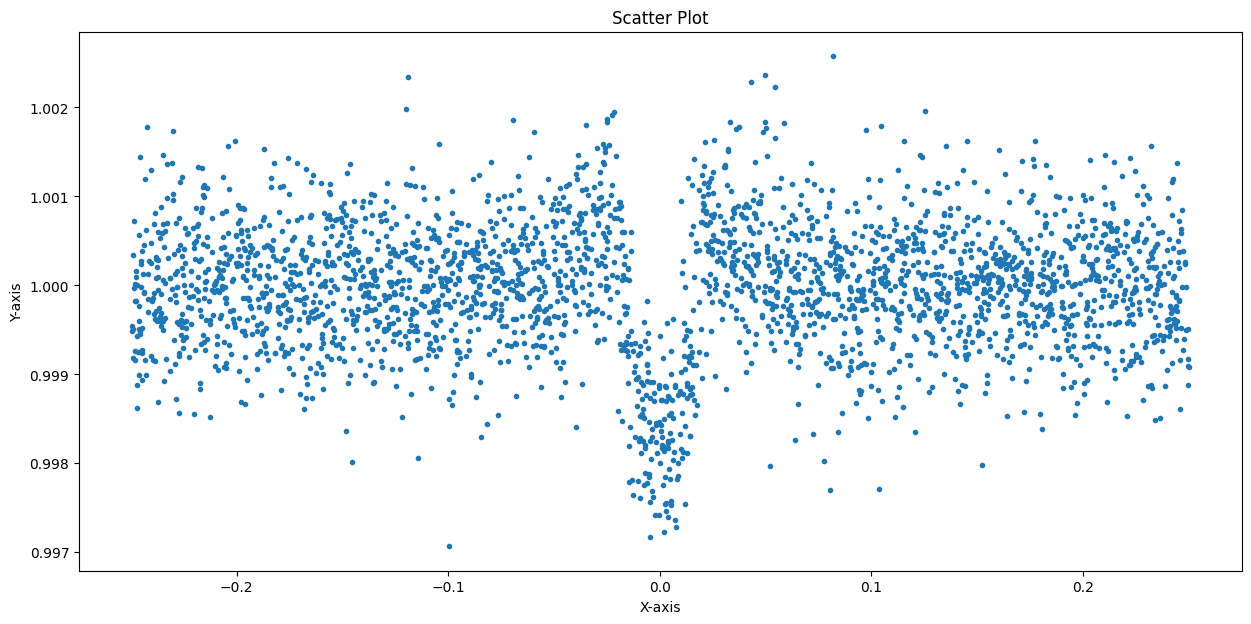

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [5]:
ID = 101955023
sectors = np.array([9, 10, 36, 63])
target = tr.target(ID=ID, sectors=sectors)

<ipython-input-6-40cccc4470bc>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_9, ap_10, ap_36, ap_63])


Sector 9


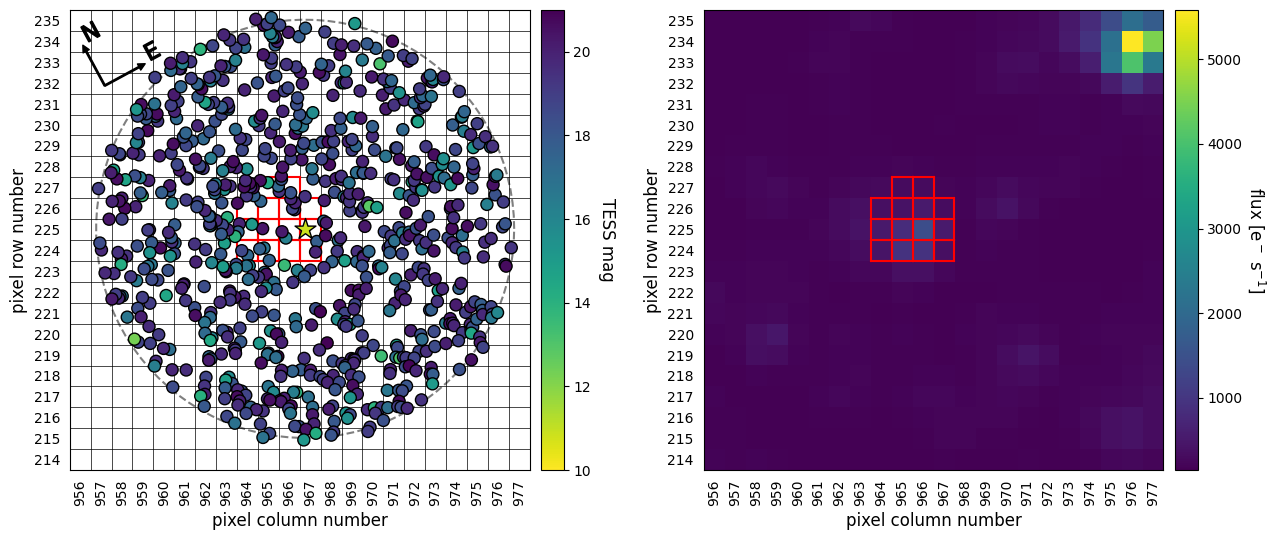

Sector 10


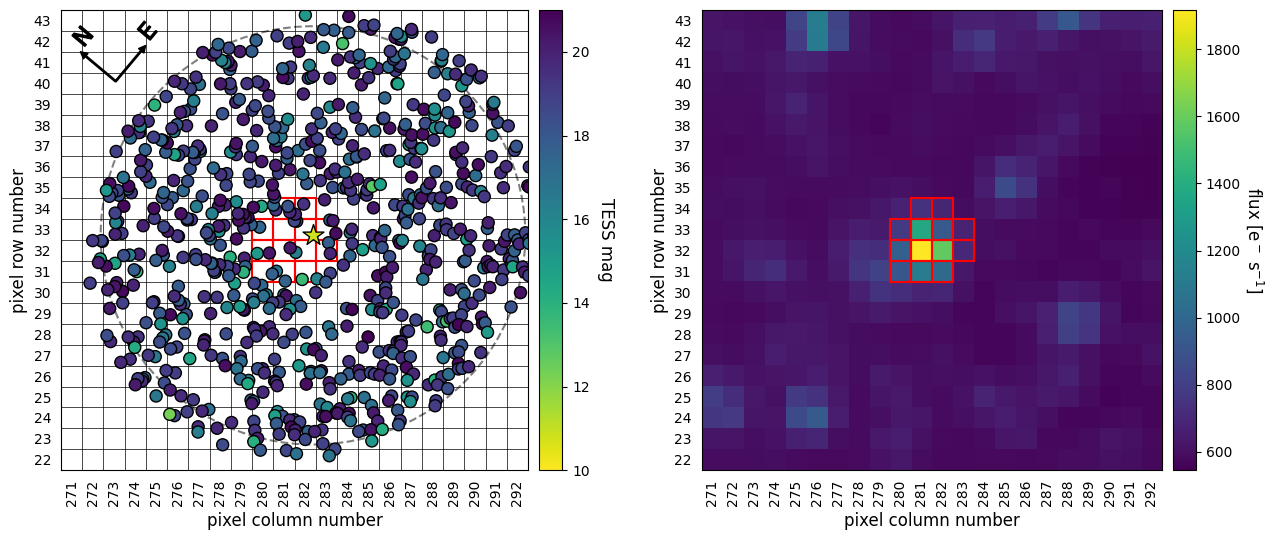

Sector 36


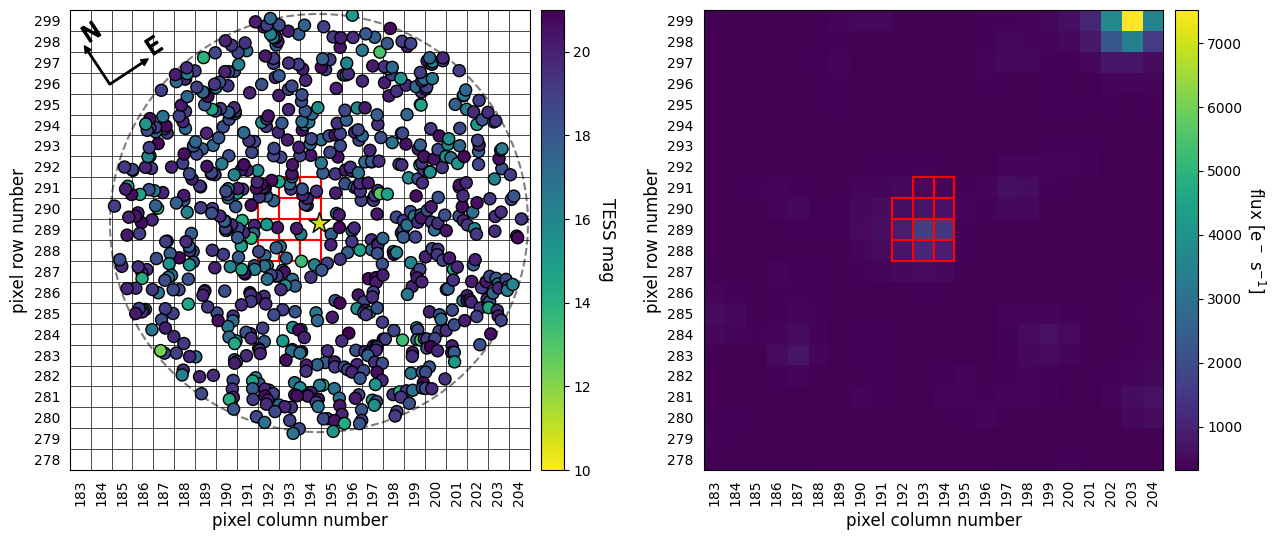

Sector 63


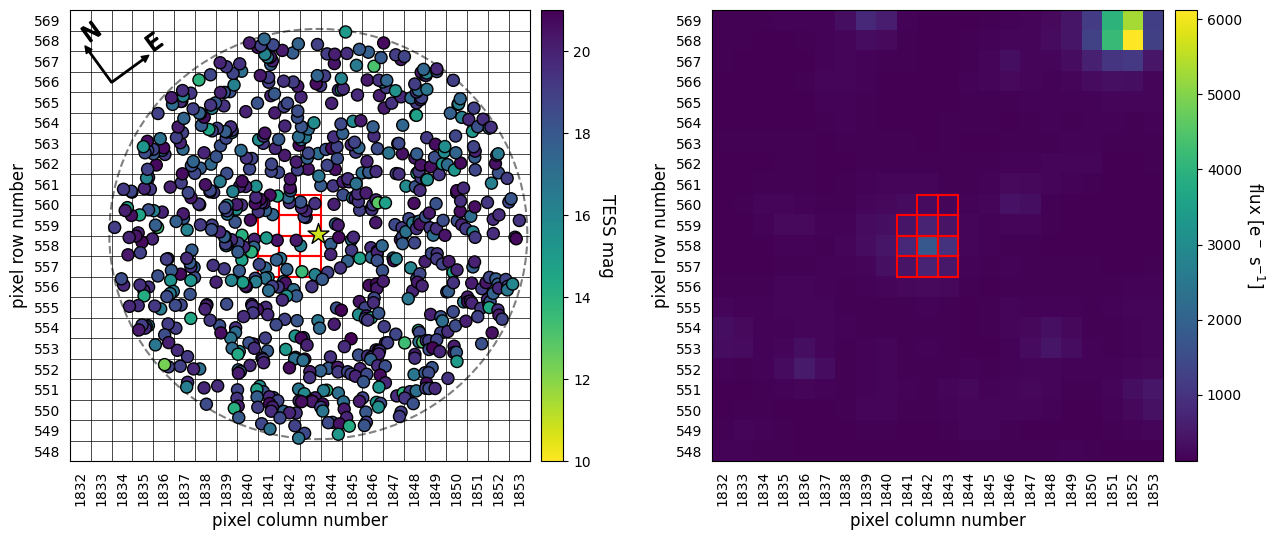

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,101955023,10.8372,9.245,8.666,8.322,153.715743,-47.156719,0.195794,0.226407,3261.0,79.254300,0.000,0.000
1,869692495,17.6953,NaN,NaN,NaN,153.717364,-47.161052,1.330000,0.783826,6506.0,0.137720,16.093,165.727
2,869692431,17.5342,NaN,NaN,NaN,153.723724,-47.157345,0.970000,1.319370,5519.0,0.047746,19.666,96.579
3,869692499,19.3687,NaN,NaN,NaN,153.715766,-47.151052,NaN,NaN,5044.0,-0.547279,20.403,0.158
4,869692440,20.6584,NaN,NaN,NaN,153.721580,-47.160855,NaN,NaN,NaN,NaN,20.636,136.179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,869692686,20.0709,NaN,NaN,NaN,153.739206,-47.103066,NaN,NaN,NaN,NaN,201.518,16.577
754,869692329,18.9518,NaN,NaN,NaN,153.796333,-47.145145,NaN,NaN,3936.0,1.084690,201.656,78.105
755,869692098,18.8032,NaN,NaN,NaN,153.754955,-47.206044,NaN,NaN,5413.0,0.432452,201.832,151.631
756,869695944,18.9867,NaN,NaN,NaN,153.651363,-47.121424,NaN,NaN,5492.0,0.452962,202.484,308.844


In [6]:
ap_9 = np.array([[964.0, 224.0], [964.0, 225.0], [964.0, 226.0], [965.0, 224.0], [965.0,
        225.0], [965.0, 226.0], [965.0, 227.0], [966.0, 224.0], [966.0, 225.0], [
        966.0, 226.0], [966.0, 227.0], [967.0, 224.0], [967.0, 225.0], [967.0, 226.0]])
ap_10 = np.array([[280.0, 31.0], [280.0, 32.0], [280.0, 33.0], [281.0, 31.0], [281.0, 32.0],
      [281.0, 33.0], [281.0, 34.0], [282.0, 31.0], [282.0, 32.0], [282.0, 33.0], [
        282.0, 34.0], [283.0, 32.0], [283.0, 33.0]])
ap_36 = np.array([[192.0, 288.0], [192.0,
        289.0], [192.0, 290.0], [193.0, 288.0], [193.0, 289.0], [193.0, 290.0], [
        193.0, 291.0], [194.0, 288.0], [194.0, 289.0], [194.0, 290.0], [194.0, 291.0]])
ap_63 = np.array([[1841.0, 557.0], [1841.0, 558.0], [1841.0, 559.0], [1842.0, 557.0], [1842.0,
        558.0], [1842.0, 559.0], [1842.0, 560.0], [1843.0, 557.0], [1843.0, 558.0],
      [1843.0, 559.0], [1843.0, 560.0]])

apertures = np.array([ap_9, ap_10, ap_36, ap_63])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [7]:
target.calc_depths(tdepth=1.671, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,101955023,10.8372,9.245,8.666,8.322,153.715743,-47.156719,0.195794,0.226407,3261.0,79.254300,0.000,0.000,8.332622e-01,0.0
1,869692495,17.6953,NaN,NaN,NaN,153.717364,-47.161052,1.330000,0.783826,6506.0,0.137720,16.093,165.727,8.604863e-04,0.0
2,869692431,17.5342,NaN,NaN,NaN,153.723724,-47.157345,0.970000,1.319370,5519.0,0.047746,19.666,96.579,6.919888e-04,0.0
3,869692499,19.3687,NaN,NaN,NaN,153.715766,-47.151052,NaN,NaN,5044.0,-0.547279,20.403,0.158,3.878233e-04,0.0
4,869692440,20.6584,NaN,NaN,NaN,153.721580,-47.160855,NaN,NaN,NaN,NaN,20.636,136.179,3.420709e-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,869692686,20.0709,NaN,NaN,NaN,153.739206,-47.103066,NaN,NaN,NaN,NaN,201.518,16.577,2.507587e-28,0.0
754,869692329,18.9518,NaN,NaN,NaN,153.796333,-47.145145,NaN,NaN,3936.0,1.084690,201.656,78.105,1.014557e-33,0.0
755,869692098,18.8032,NaN,NaN,NaN,153.754955,-47.206044,NaN,NaN,5413.0,0.432452,201.832,151.631,8.338970e-37,0.0
756,869695944,18.9867,NaN,NaN,NaN,153.651363,-47.121424,NaN,NaN,5492.0,0.452962,202.484,308.844,2.907279e-23,0.0


In [8]:
%%time

# read in the light curve
lc = pd.read_csv("TIC_101955023_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = 1.6289230050605

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

CPU times: user 83.3 ms, sys: 2.96 ms, total: 86.3 ms
Wall time: 119 ms


In [9]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.75
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
1,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
2,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
3,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
4,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
5,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
6,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
7,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
8,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333
9,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333


In [11]:
# target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [10]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.75 +/- 0.0
NFPP = 0.0 +/- 0.0
CPU times: user 39.3 ms, sys: 943 µs, total: 40.3 ms
Wall time: 72.8 ms


Our final conclusion about this TIC 101955023 is that it is most likely a false positive (accourding to the range of FPP and NFPP set by TRICERATOPS).